In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, binarize
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# SMOTE
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot

#KNN Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#decision trees Imports
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
# import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.externals.six import StringIO

#Random Forest Imports
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
hr_data = pd.read_csv('datafiles/hrdata_cleaned',index_col=0)

In [3]:
df_target = hr_data['performance_score_Exceptional']+hr_data['performance_score_Exceeds']
df_feats = hr_data.drop(columns=['performance_score_Exceeds','performance_score_Exceptional','performance_score_Fully Meets','performance_score_N/A- too early to review','performance_score_Needs Improvement','performance_score_PIP'])


# Train Test Split

In [4]:
#creating matrix of features 
X = df_feats.drop(columns=['name'])
#assigning target variable 
y = df_target
#creating a list of features
feature_cols = X.columns

In [5]:
y.value_counts()

0    263
1     37
dtype: int64

In [6]:
# Use x and y variables to split the training data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40,random_state=42)

1. Logistic Regression

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [9]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.8583333333333333


In [10]:
y_test.value_counts()

0    107
1     13
dtype: int64

In [11]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[102   5]
 [ 12   1]]


In [12]:
#pip install imbalanced-learn

In [13]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 263, 1: 263})


In [14]:
# Use x and y variables to split the training data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40,random_state=42)

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
print('Accuracy_Score--------')
print(metrics.accuracy_score(y_test, y_pred_class))
print('\n')
print('Value_Counts--------')
print(y_test.value_counts())

Accuracy_Score--------
0.8293838862559242


Value_Counts--------
1    111
0    100
dtype: int64


**Confusion matrix**

In [17]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[87 13]
 [23 88]]


# 1. Is there any relationship between who a person works for and their performance score?
- Correlation between manager and performance score 

In [86]:
hr_data = hr_data.set_index('name')

In [103]:
data = data.set_index('Employee Name')

In [107]:
data['Manager Name']

Employee Name
Brown, Mia              Brandon R. LeBlanc
LaRotonda, William      Brandon R. LeBlanc
Steans, Tyrone          Brandon R. LeBlanc
Howard, Estelle         Brandon R. LeBlanc
Singh, Nan              Brandon R. LeBlanc
                               ...        
Saada, Adell               Alex Sweetwater
Szabo, Andrew              Alex Sweetwater
True, Edward               Alex Sweetwater
Sweetwater, Alex           Jennifer Zamora
NaN                                    NaN
Name: Manager Name, Length: 302, dtype: object

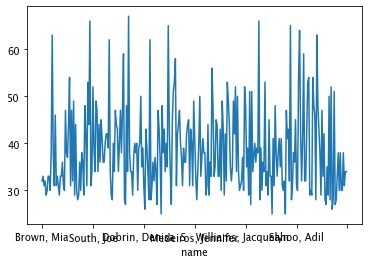

In [91]:
hr_data['age'].plot()

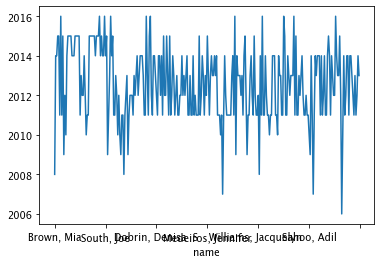

In [96]:
hr_data['year_of_hire'].plot()

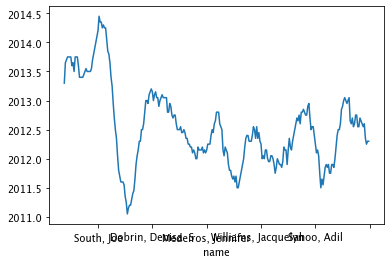

In [99]:
#moving average
hr_data['year_of_hire'].rolling(20).mean().plot()

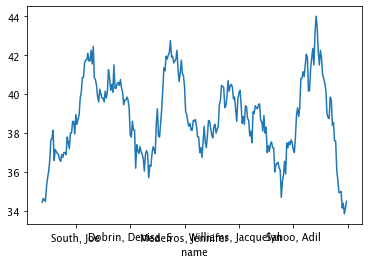

In [100]:
hr_data['age'].rolling(20).mean().plot()

In [112]:
manager_list = list(data['Manager Name'].unique())

In [118]:
def manager(lst):
    for i in lst:
        print("manager_name_"+i)

In [124]:
manager(manager_list)

manager_name_Brandon R. LeBlanc
manager_name_Janet King
manager_name_Board of Directors
manager_name_Simon Roup
manager_name_Jennifer Zamora
manager_name_Eric Dougall
manager_name_Peter Monroe
manager_name_Michael Albert
manager_name_Elijiah Gray
manager_name_Webster Butler
manager_name_Amy Dunn
manager_name_Ketsia Liebig
manager_name_Brannon Miller
manager_name_David Stanley
manager_name_Kissy Sullivan
manager_name_Kelley Spirea
manager_name_Lynn Daneault
manager_name_John Smith
manager_name_Debra Houlihan
manager_name_Alex Sweetwater


TypeError: can only concatenate str (not "float") to str